# Multivariate Gaussians

多维建模不确定性

In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

## Introduction

上一章中的技术非常强大，但它们只适用于一个变量或维度。 它们无法表示多维数据，例如狗在田野中的位置和速度。 位置和速度是相互关联的，正如我们在 g-h 章节中学到的，我们永远不应该丢弃信息。 在本章中，我们将学习如何以概率的方式描述这种关系。 通过这一关键见解，我们将获得明显更好的过滤器性能。

## Multivariate Normal Distributions

我们一直将高斯用于标量随机变量，表示为 $\mathcal{N}(\mu, \sigma^2)$。 一个更正式的术语是*单变量正常*，其中单变量表示“一个变量”。 高斯的概率分布称为*单变量正态分布*。

*多元正态分布*可能是什么？ *Multivariate* 表示多个变量。 我们的目标是能够表示具有多个维度的正态分布。 我不一定指空间维度——如果我们跟踪飞机在 (x, y, z) 中的位置、速度和加速度，这会给我们带来九维问题。 考虑一个二维情况。 它可能是机器人的 *x* 和 *y* 坐标，可能是狗在 x 轴上的位置和速度，或者是奶牛场的产奶量和进料速度。 这并不重要。 我们可以看到，对于 $N$ 维度，我们需要 $N$ 均值，我们将其排列在列矩阵（向量）中，如下所示：

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

假设我们相信 $x = 2$ 和 $y = 17$。 我们会有

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix} 
$$

下一步是表示我们的方差。 乍一看，我们可能认为我们还需要 N 个维度的 N 个方差。 我们可能想说 x 的方差是 10，y 的方差是 4，就像这样。

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$ 

这是不完整的，因为它没有考虑更一般的情况。 在 **Gaussians** 章节中，我们计算了学生身高的方差。 这是衡量高度如何相对于彼此变化的量度。 如果所有学生的身高相同，则方差为 0，如果他们的身高相差很大，则方差会很大。

身高和体重之间也有关系。 一般来说，高个子比矮个子重。 身高和体重*相关*。 我们想要一种方法，不仅可以表达我们认为的身高和体重的差异，还可以表达它们的相关程度。 换句话说，我们想知道体重与身高相比如何变化。 我们称之为*协方差*。

在我们能够理解多元正态分布之前，我们需要了解相关性和协方差背后的数学。

## Correlation and Covariance

*协方差*描述了两个变量一起变化的程度。协方差是*相关方差*的缩写。换句话说，*variance* 是衡量总体之间如何变化的量度，而 *covariance* 是衡量两个变量相对于彼此变化多少的量度。例如，随着身高的增加，体重通常也会增加。这些变量是*相关的*。它们是*正相关的*，因为随着一个变量变大，另一个变量也会变大。随着室外温度降低，家庭取暖费用增加。这些是*负相关*或*负相关*，因为随着一个变量变大，另一个变量会降低。茶叶的价格和我的狗摇尾巴的次数彼此之间没有关系，我们说它们是*不相关*或*独立*——每个都可以独立改变。

相关性允许预测。如果你比我高很多，我可以预测你也比我重。随着冬天的到来，我预测我会花更多的钱来取暖。如果我的狗更多地摇尾巴，我不会断定茶叶价格会发生变化。

例如，这是学校田径队学生的身高和体重图。如果一个学生身高 68 英寸，我可以预测他们的体重约为 160 磅。由于相关性并不完美，我的预测也不完美。

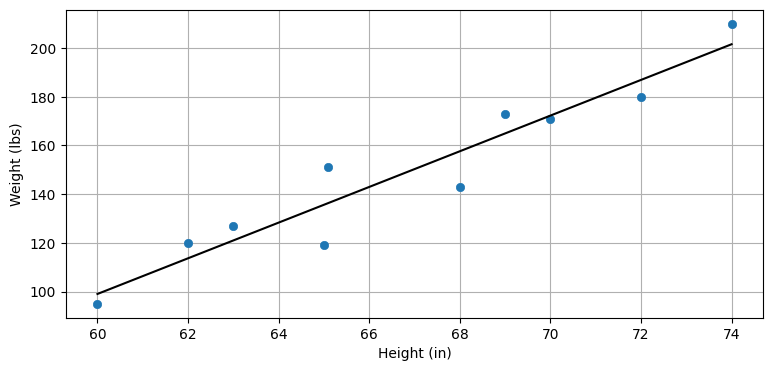

In [3]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

在本书中，我们只考虑*线性相关*。 我们假设变量之间的关系是线性的。 也就是说，直线非常适合数据。 我在上图中的数据中拟合了一条直线。 *非线性相关*的概念存在，但我们不会使用它。

$X$ 和 $Y$ 之间的协方差方程为

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

其中 $\mathbb E[X]$ 是 X 的*预期值*，定义为

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x & \mbox{continuous}\end{cases}$$

我们假设每个数据点的可能性相等，所以每个数据点的概率是 $\frac{1}{N}$，给出

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$

对于我们将要考虑的离散情况。

将协方差方程与方差方程进行比较。 如您所见，它们非常相似：

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

特别是，如果你计算 $COV(X, X)$，你会得到 $VAR(X)$ 的等式，它支持我的说法，即方差计算随机变量如何在自身之间变化。

我们使用*协方差矩阵*来表示多元正态分布的协方差，它看起来像这样：

$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

对角线包含每个变量的方差，非对角线元素包含 $i^{th}$ 和 $j^{th}$ 变量之间的协方差。 所以$\sigma_3^2$是第三个变量的方差，$\sigma_{13}$是第一个和第三个变量的协方差。

协方差为 0 表示没有相关性。 如果 $x$ 的方差是 10，$y$ 的方差是 4，并且 $x$ 和 $y$ 之间没有线性相关，那么我们可以写

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

如果 $x$ 和 $y$ 之间存在少量正相关，我们可能会有

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

其中 1.2 是 $x$ 和 $y$ 之间的协方差。 我说相关性是“小”的，因为 1.2 的协方差相对于 10 的方差很小。

如果 $x$ 和 $y$ 之间存在大量负相关，我们可能会有

$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

协方差矩阵是对称的。 毕竟，$x$ 和 $y$ 之间的协方差总是等于 $y$ 和 $x$ 之间的协方差。 也就是说，对于任何 $x$ 和 $y$，$\sigma_{xy}=\sigma_{yx}$。

我担心我可能会失去你，所以让我们举个例子。 在 **Gaussians** 章节中，我们有一班身高 H=[1.8, 2.0, 1.7, 1.9, 1.6] 米的学生。 我们计算了：

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$

容易，对吧？ 如果我们给学生称重，我们可能会发现他们的权重为 W = [70.1, 91.2, 59.5, 93.2, 53.5]。 我们可以使用协方差方程来创建协方差矩阵吗？ 当然。 它看起来像：

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

我们刚刚计算了高度的方差，它将位于矩阵的左上角。 右下角包含权重的变化。 使用相同的方程，我们得到：

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$

现在是协方差。 使用上面的公式，我们计算：

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$

这很乏味，但很容易。 我们再也不会这样做了，因为当然，NumPy 会为你计算它。 

In [4]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

这与我们的计算不符！什么地方出了错？没有什么。 NumPy 对小样本量进行校正；它使用 $\frac{1}{N-1}$ 作为归一化项，而不是 $\frac{1}{N}$。

这有点超出了本书的范围。简而言之，假设实际班级规模为 200 名学生，我们抽取了 5 名学生的样本来执行此计算，因为我们负担不起对所有 200 名学生进行测量和称重的费用。几乎可以肯定，我们的估计器中会有一些错误，因为样本不太可能完美地代表该类。当我们的样本量接近 200 时，误差将接近 0。我们说后者没有 *bias*，并且我们有一个 *unbiased estimator*。相反，当我们取一个小样本时，就会有偏差（误差不为零），并且我们有一个 *biased estimator*。

如果误差为零，则除以 $N$ 是有意义的。我不会证明原因，但对于有偏差的估计器，我们使用 $\frac{1}{N-1}$ 来纠正小样本量。 NumPy 默认情况下会这样做，因为实际上我们几乎总是使用来自更大集合的数据样本。如果您想要我们上面计算的无偏估计器，请在调用“np.cov”时使用“bias=1”。

In [5]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

这与我们的计算一致。 我们不会在本书中再次使用 `bias=1`，因为我们使用的是*随机变量*，这些变量是从我们正在跟踪的对象的无限位置集合中采样的。 在这里，我们正在计算整个总体的方差和协方差，因此 `bias=1` 是正确的。

这个矩阵告诉我们什么？ 它告诉我们身高的变化是 0.02 $m^2$，体重的变化是 261.788 $kg^2$。 此外，它告诉我们体重和身高呈正相关——随着身高的增加，体重也会增加。

让我们创建完全相关的数据。 我的意思是数据完全适合一条线 - 这条线没有差异。

In [6]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

我们可以从协方差矩阵中看到，协方差等于 x 和 y 的方差。

现在让我们为其中一个变量添加一些噪音，使它们不再完全相关。 我将使 $Y$ 为负以创建负相关。

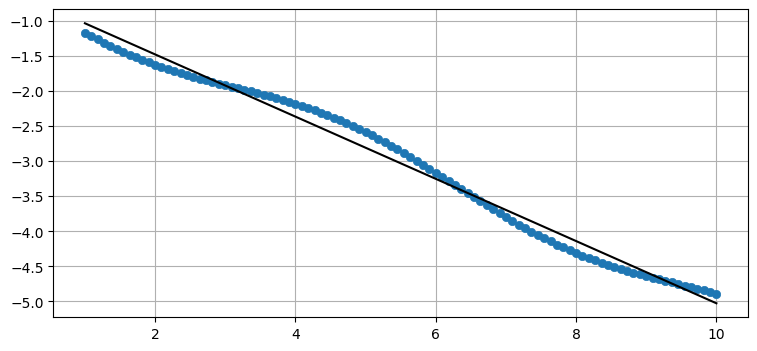

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [7]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

数据不再形成一条直线。 协方差为 $\sigma_{xy}=-3.08$。 与 $\sigma_x^2$ 和 $\sigma_y^2$ 的大小相比，它并不接近于零，因此我们知道仍然存在高度相关性。 我们可以通过查看图表来验证这一点。 数据几乎形成一条直线。

现在我将随机噪声添加到一条直线上。

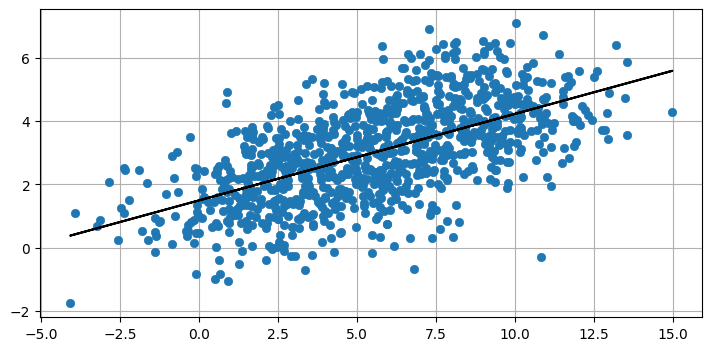

[[11.105  3.04 ]
 [ 3.04   2.316]]


In [8]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

我们看到协方差相对于方差较小，反映了 $X$ 和 $Y$ 之间的较低相关性。 我们仍然可以通过这些数据拟合一条直线，但数据的变化要大得多。

最后，这是完全随机数据之间的协方差。

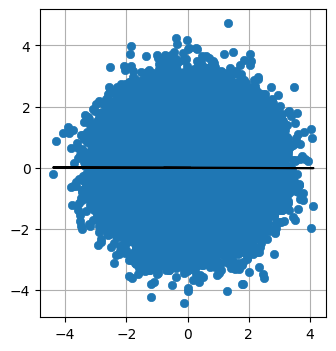

[[ 1.003 -0.003]
 [-0.003  0.997]]


In [9]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

这里的协方差非常接近于零。 正如您在图中看到的那样，没有明确的方法可以绘制一条线来拟合数据。 一条垂直线与我展示的水平线一样令人信服。

## Multivariate Normal Distribution Equation

回想一下 **Gaussians** 章节中的正态分布方程：

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$


这是 $n$ 维度的多元正态分布。

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

多变量版本仅用矩阵替换单变量方程的标量。 如果你相当精通线性代数，这个方程应该看起来很容易处理。 如果没有，请不要担心，FilterPy 和 SciPy 都提供了为您计算它的函数。 让我们暂时忽略计算并绘制它以查看它的样子。

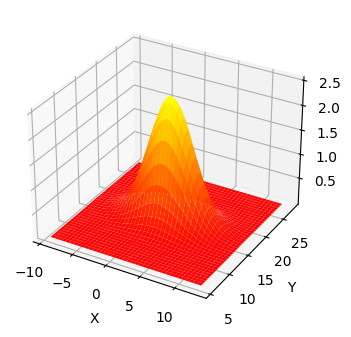

In [10]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

这是一个多元高斯图，平均值为 $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$，协方差为 $\Sigma=[\begin{smallmatrix}10&0\\0&4 \end{smallmatrix}]$。三维形状显示 z 轴上任何 $(X, Y)$ 值的概率密度。我已将 x 和 y 的方差投影到图表的墙上——您可以看到它们呈现高斯钟形曲线形状。 $X$ 的曲线比 $Y$ 的曲线更宽，这可以通过 $\sigma_x^2=10$ 和 $\sigma_y^2=4$ 来解释。 3D 表面的最高点位于 $X$ 和 $Y$ 的均值处。

所有多元高斯分布都具有这种形状。如果我们将其视为狗位置的高斯分布，则 ($X, Y$) 的每个点的 z 值就是狗在该位置的概率密度。严格来说，这是*联合概率密度函数*，我将很快对其进行定义。因此，狗靠近 (2, 17) 的概率最高，靠近 (5, 14) 的概率适中，靠近 (10, 10) 的概率非常低。与单变量情况一样，这是*概率密度*，而不是*概率*。连续分布具有无限范围，因此恰好位于 (2, 17) 或任何其他点的概率为 0%。我们可以通过用积分计算表面下的体积来计算在给定范围内的概率。

FilterPy [2] 在 `filterpy.stats.` 模块中使用函数 `multivariate_gaussian()` 实现方程。 SciPy 的 `stats` 模块使用 `multivariate_normal()` 实现多元正态方程。 它实现了一种“冻结”形式，您可以在其中设置一次均值和协方差，然后在任意数量的调用中计算任意数量的 x 值的概率密度。 我将我的函数命名为“multivariate_gaussian()”，以确保它不会与 SciPy 版本混淆。

> The <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">tutorial</a>[1] for the `scipy.stats` module explains 'freezing' distributions and other very useful features.

In [11]:
from filterpy.stats import gaussian, multivariate_gaussian

我将演示如何使用它，然后继续做更有趣的事情。

首先，如果我们认为我们的狗在 (2, 7) 的概率密度为 (2, 7)，则让我们找到它的概率密度，其中 $x$ 的方差为 8，$y$ 的方差为 3。

首先将 $x$ 设置为 (2.5, 7.3)。 您可以使用元组、列表或 NumPy 数组。

In [12]:
x = [2.5, 7.3]

接下来，我们设置我们的信念的平均值：

In [13]:
mu = [2.0, 7.0]

最后，我们必须定义我们的协方差矩阵。 在问题陈述中，我们没有提到 $x$ 和 $y$ 之间的任何相关性，我们假设没有相关性。 这是有道理的； 一只狗可以选择在 $x$ 方向或 $y$ 方向上独立游荡，而不会影响另一个。 我将使用变量名“P”。 卡尔曼滤波器使用名称 $\textbf{P}$ 作为协方差矩阵，我们需要熟悉这些约定。

In [14]:
P = [[8., 0.], 
     [0., 3.]]

现在调用函数

In [15]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

我们可以从 scipy.stats 模块得到相同的结果。

In [16]:
import scipy
from scipy.stats import multivariate_normal
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')


0.0315


是时候定义一些术语了。 *联合概率*，表示为 $P(x,y)$，是 $x$ 和 $y$ 发生的概率。 例如，如果你掷两个骰子 $P(2,5)$ 是第一个骰子掷出 2 而第二个骰子掷出 5 的概率。假设骰子是六面且公平的，则概率 $P(2, 5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$。 上面的 3D 图表显示了*联合概率密度函数*。

*边际概率*是不考虑任何其他事件的事件发生的概率。 在上面的图表中，左侧绘制的高斯曲线是 $Y$ 的边际。 这是狗在 $Y$ 中任何位置的概率，而不管 $X$ 的值。 早些时候我写过“我已经将 x 和 y 的方差投影到图表的墙上”； 这些是 $x$ 和 $y$ 的边际概率。 高斯的另一个计算优势是多元高斯的边缘是另一个高斯！

让我们以稍微不同的方式来看待这个问题。 我将生成 1,000 个分布为 $[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$ 的点，而不是绘制一个显示概率分布的表面。

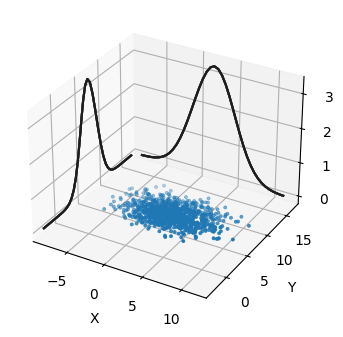

In [17]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

考虑到这些特定的均值和协方差，我们可以将采样点视为我们的狗的可能位置。 侧面的等高线显示了 $X$ 和 $Y$ 的边际概率。 我们可以看到，他更有可能出现在点数多的 (2, 7) 处，而不是点数少的 (-5, 5) 处。

尽管这些情节很漂亮，但很难从中获得有用的信息。 例如，很难判断 $X$ 和 $Y$ 是否具有相同的方差，以及它们的相关程度。 在本书的大部分内容中，我会将高斯曲线显示为等高线图。

等高线图显示多元高斯对特定标准差的取值范围。 这就像从 3D 图中取出水平切片。

这些图显示了 3 个标准偏差的切片形状。

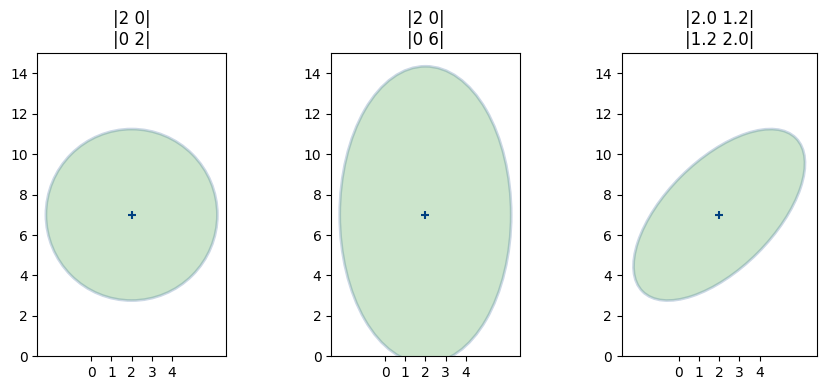

In [18]:
mkf_internal.plot_3_covariances()

对于那些在线或在计算机上的 Jupyter Notebook 中查看此内容的人，这里有一个在保持方差不变的情况下改变协方差的动画。

<img src='animations/multivariate_ellipse.gif'>

(source: http://git.io/vqxLS)

这些图看起来像圆形和椭圆形。 事实上，事实证明，通过多元高斯的任何切片都是椭圆。 因此，在统计学中，我们不将这些称为“等高线图”，而是将其称为*误差椭圆*或*置信椭圆*； 这些条款是可以互换的。

此代码使用来自 `filterpy.stats` 的函数 `plot_covariance_ellipse()`。 默认情况下，该函数显示一个标准偏差，但您可以使用 `variance` 或 `std` 参数来控制显示的内容。 例如，`variance=3**2` 或 `std=3` 会显示第三个标准差，而 `variance=[1,4,9]` 或 `std=[1,2,3]` 会显示 第一、第二和第三标准差。

/tmp/ipykernel_21815/376262884.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False);


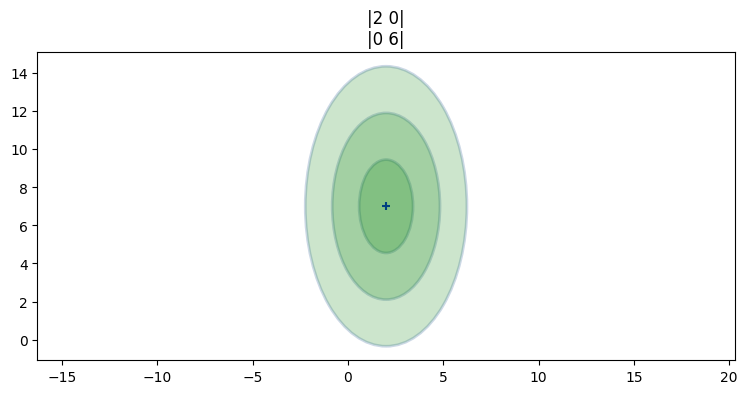

In [19]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

纯色可能向您表明标准差之间的概率分布是恒定的。 这是不正确的，您可以从高斯的 3D 图看出。 这是协方差 ($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$ 概率分布的 2D 阴影表示。 较深的灰色对应于较高的概率密度。

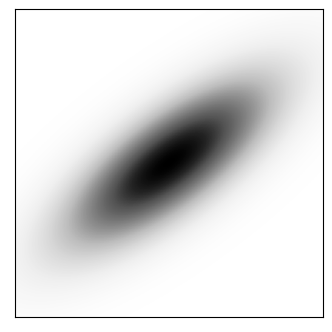

In [20]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

思考这些情节的物理解释可以阐明它们的含义。 第一个图的均值和协方差是

$$
\mathbf{\mu} =\begin{bmatrix}2\\7\end{bmatrix},\, \,
\Sigma = \begin{bmatrix}2&0\\0&2 \end{bmatrix}
$$ 

/tmp/ipykernel_21815/4053888375.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False)


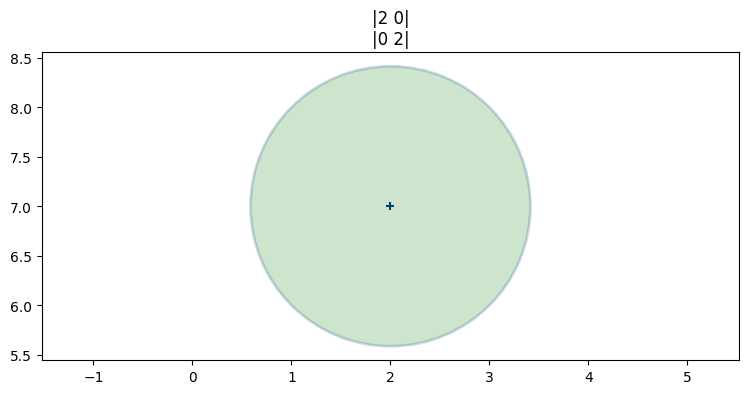

In [21]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

贝叶斯对此的思考方式是，椭圆向我们展示了我们信念中的错误数量。 一个小圆圈表示我们有一个非常小的错误，一个非常大的圆圈表示我们的信念有很多错误。 椭圆的形状向我们展示了 $X$ 和 $Y$ 中误差的几何关系。 这里我们有一个圆圈，因此 $X$ 和 $Y$ 中的错误的可能性相同。

第二个图的均值和协方差是

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&0\\0&6\end{bmatrix}
$$

/tmp/ipykernel_21815/1367993942.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False)


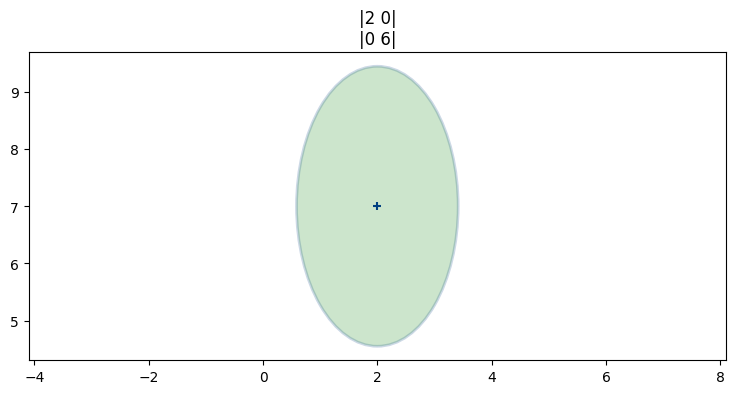

In [22]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

这次我们对 $X$ ($\sigma_x^2=2$) 与 $Y$ ($\sigma^2_y=6$) 使用不同的方差。 结果是一个又高又窄的椭圆。 我们可以看到 $Y$ 与 $X$ 的不确定性更多。 在这两种情况下，我们都认为狗在 (2, 7)，但不确定性是不同的。

第三个图显示了均值和协方差

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&1.2\\1.2&2\end{bmatrix}
$$

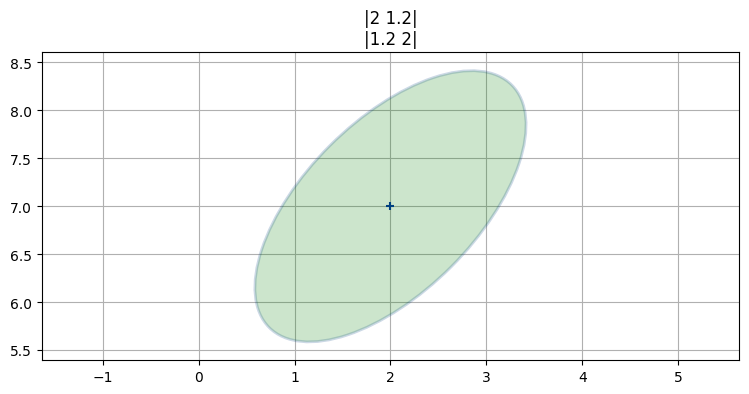

In [23]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

这是第一个在协方差的非对角元素中具有值的等值线，这是第一个带有倾斜椭圆的等值线图。 这不是巧合。 这两个事实告诉我们同样的事情。 一个倾斜的椭圆告诉我们 𝑥 和 𝑦 值在某种程度上是相关的。 协方差矩阵中的非对角元素非零，表明存在相关性。

回想一下身高与体重的关系图。 它形成了一组倾斜的点。 我们可以使用 NumPy 的 cov() 函数通过将两个或多个变量放入二维数组来计算它们的协方差。 让我们这样做，然后在数据顶部绘制 2𝜎 协方差椭圆。 我们需要使用bias=1，因为数据代表整个人群； 它不是一个样本。

In [24]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.5249,  135.701 ],
       [ 135.701 , 1092.29  ]])

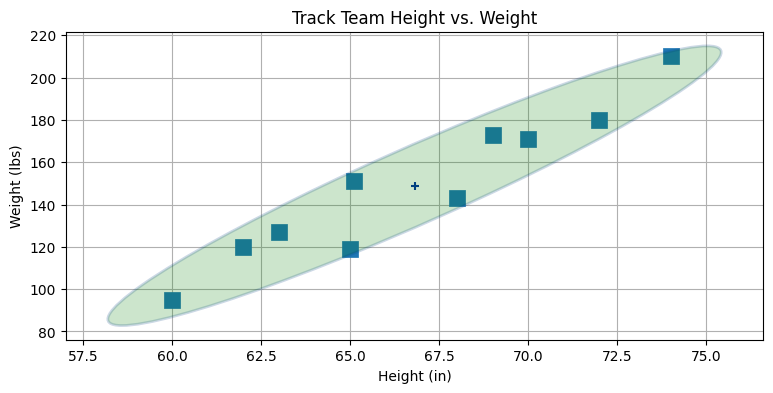

In [25]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

这应该有助于您对协方差的含义和使用形成强烈的直觉。 协方差椭圆向您展示了数据是如何相互“分散”的。 像这样的窄椭圆告诉您数据非常相关。 对于任何给定的高度，只有很窄的重量范围。 椭圆向右倾斜，告诉我们存在正相关——随着 x 增加，y 也增加。 如果椭圆向左倾斜，则相关性将为负 - 随着 x 增加 y 减少。 我们可以在下面的图中看到这一点：

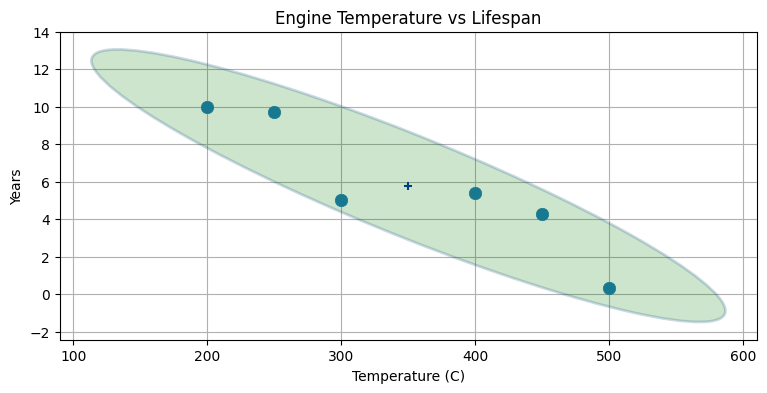

In [26]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

方差和协方差之间的关系很难通过检查来解决，所以这里有一个交互式图。 （如果您以静态形式阅读此内容，在线运行此内容的说明如下：https://git.io/vza7b）

In [27]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…


我们不会在本书中使用这个系数，但你可能会在其他地方看到它。 如果不感兴趣，您可以安全地跳过此部分。

两个变量之间的相关性可以用*Pearson's Correlation Coefficient* 给出一个数值。 它被定义为

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$

该值的范围可以从 -1 到 1。如果协方差为 0，则 $\rho=0$。 大于0的值表示关系为正相关，负值表示存在负相关。 接近 -1 或 1 的值表示非常强的相关性，接近 0 的值表示非常弱的相关性。

相关性和协方差密切相关。 协方差具有与之相关的单位，而相关性是无单位的比率。 例如，对于我们的狗，$\sigma_{xy}$ 的单位是米的平方。

我们可以使用 scipy.stats.pearsonr 函数来计算皮尔逊系数。 它返回 Pearson 系数和 2 尾 p 值的元组。 本书未使用后者。 在这里，我们计算学生运动员的身高与体重的 $\rho$：

In [28]:
from scipy.stats import pearsonr
pearsonr(height, weight)[0]

0.9539731096080194

在这里，我们计算发动机温度和寿命之间的相关性。

In [29]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527254

## Using Correlations to Improve Estimates

假设我们相信我们的狗在位置 (5, 10) 具有一些给定的协方差。 如果 x 和 y 的标准偏差各为 2 米，但它们是强相关的，则协方差等值线看起来像这样。

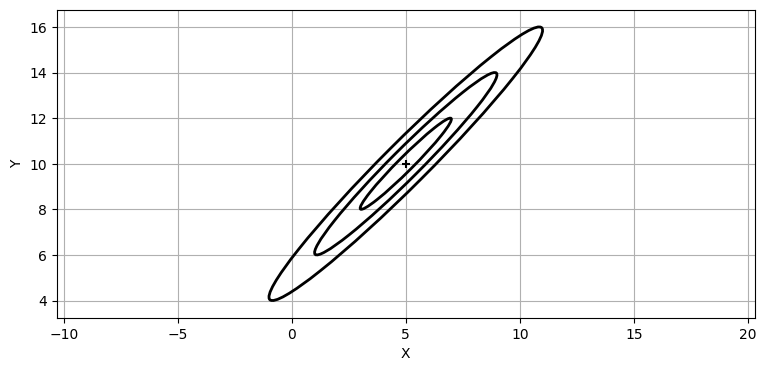

In [30]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

现在假设我要告诉你我们知道 $x=7.5$。 我们可以推断出 $y$ 的价值吗？ 该位置极有可能位于 3$\sigma$ 协方差椭圆内。 我们可以根据协方差矩阵推断 *y* 中的位置，因为 *x* 和 *y* 之间存在相关性。 我已经用蓝色实心圆圈说明了 y 的可能值范围。

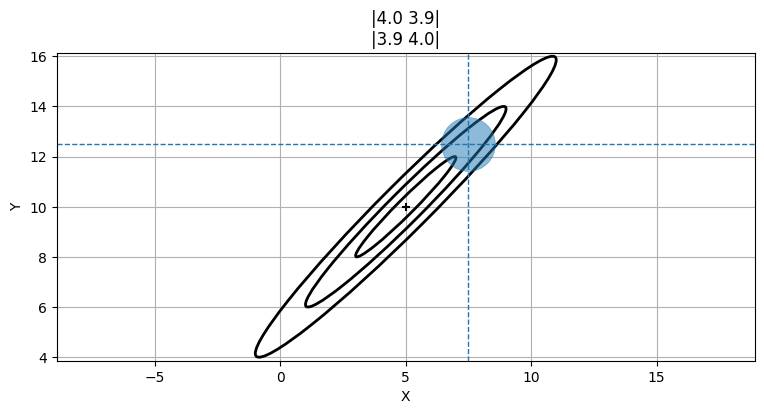

In [31]:
mkf_internal.plot_correlation_covariance()

这个圆圈在数学上不正确，但它让这个想法得到了理解。 我们将在下一节讨论数学。 现在认识到我们可以预测 $y$ 可能接近 12。$y=-10$ 的值是极不可能的。

关于 *correlation* 和 *independence* 的一句话。 如果变量是*独立的*，它们可以单独变化。 如果您走在开阔的田野中，您可以沿 $x$ 方向（东西）、$y$ 方向（南北）或其任意组合移动。 自变量也总是*不相关*。 除非在特殊情况下，相反的情况并不成立。 变量可以不相关，但相互依赖。 例如，考虑 $y=x^2$。 相关性是线性度量，因此 $x$ 和 $y$ 不相关。 然而，$y$ 依赖于 $x$。

## Multiplying Multidimensional Gaussians

在前一章中，我们通过将它们的高斯相乘来将不确定的测量与不确定的估计结合起来。 结果是另一个具有较小方差的高斯。 如果两条不确定的信息相互印证，我们的结论应该更加确定。 图表如下所示：

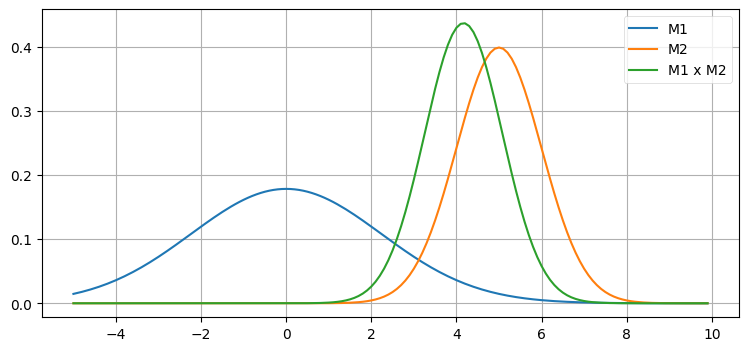

In [32]:
mkf_internal.plot_gaussian_multiply()

测量 1 和 2 的组合产生了更大的确定性，因此新的高斯更高更窄 - 方差变得更小。 同样的情况也发生在多元高斯的多个维度上。

这是乘以多元高斯的方程。 大写的 sigma ($\Sigma$) 表示这些是矩阵，而不是标量。 具体来说，它们是协方差矩阵：

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$


它们是通过将先验和估计的多元高斯插入贝叶斯定理来生成的。 我在 **Gaussians** 章节中给了你单变量情况的代数。

您不需要记住这些方程，因为它们是由稍后将介绍的卡尔曼滤波器方程计算的。 这种计算也可以在 FilterPy 中使用 `multivariate_multiply()` 方法进行，您可以从 `filterpy.stats` 导入该方法。

为了让您对此有一些直觉，请回忆一下乘以单变量高斯的方程：

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$

这看起来类似于多元方程的方程。 如果你认识到矩阵求逆（用 -1 次方表示）*就像*倒数，因为 $AA^{-1} =I$，这将更加明显。 我将把求逆重写为除法——这不是数学上正确的事情，因为矩阵的除法没有定义，但它确实有助于我们比较方程。

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

在这种形式中，单变量和多变量方程之间的关系是清楚的。

现在让我们通过一个具体的例子来探索多元高斯。 假设我们正在用两个雷达系统跟踪一架飞机。 我将忽略高度，所以我可以使用二维图。 雷达提供目标的范围和方位。 我们开始不确定飞机的位置，所以协方差，即我们对位置的不确定性，可能看起来像这样。 在贝叶斯统计的语言中，这是我们的*先验*。

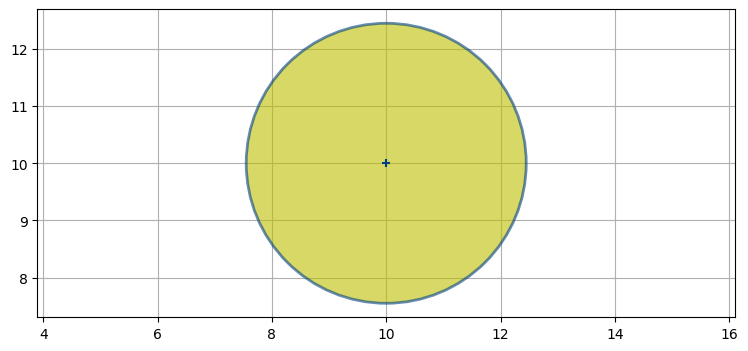

In [33]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

现在假设飞机左下方有一个雷达。 进一步假设雷达的方位测量准确，但距离测量不准确。 测量误差的协方差可能如下所示（在黄色先验之上以绿色绘制）：

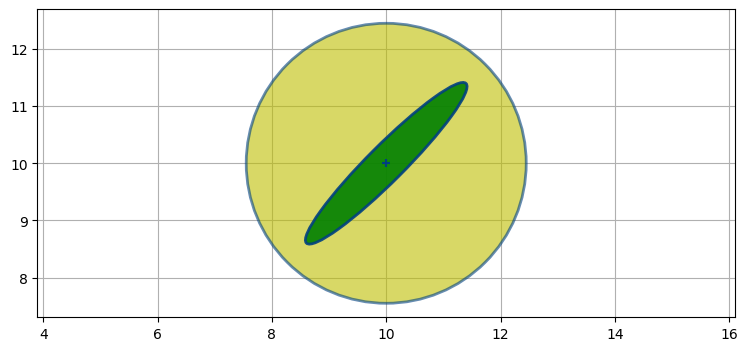

In [34]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

回想一下，贝叶斯统计将此称为*证据*。 椭圆指向雷达。 由于距离测量不准确，所以它很长，并且飞机可能在距离测量距离相当远的距离内。 它非常窄，因为方位估计非常准确，因此飞机必须非常接近方位估计。

我们想要找到*后验* - 将证据整合到先验中产生的均值和协方差。 和其他每一章一样，我们通过将证据相乘来组合证据。

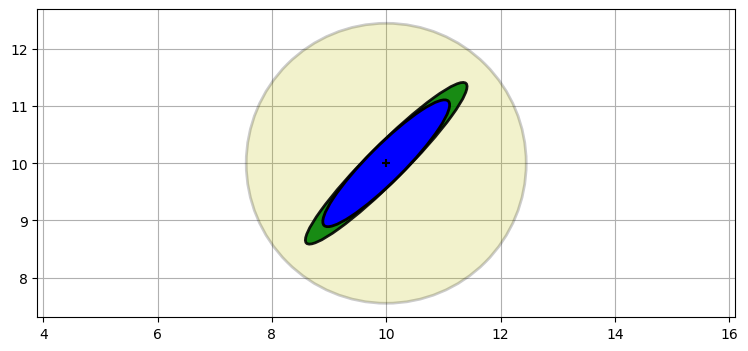

In [35]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

我用非常透明的黄色绘制了原始估计（之前），绿色（证据）绘制了雷达读数，蓝色绘制了最终估计（后验）。

后部保留了与雷达测量相同的形状和位置，但更小。 我们已经用一维高斯函数看到了这一点。 将两个高斯相乘会使方差更小，因为我们合并了更多信息，因此我们的不确定性更小。 另一个需要认识到的点是协方差形状反映了飞机和雷达系统的物理布局。 这一点的重要性将在下一步中变得清晰。

现在假设我们从第二个雷达获得测量值，这个雷达在右下方。 最后一步的后验成为我们新的先验，我用黄色绘制。 新的测量值以绿色绘制。

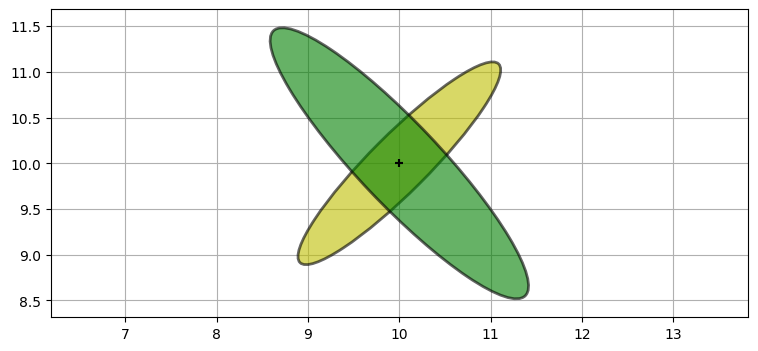

In [36]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

我们通过乘以高斯来合并这些信息：

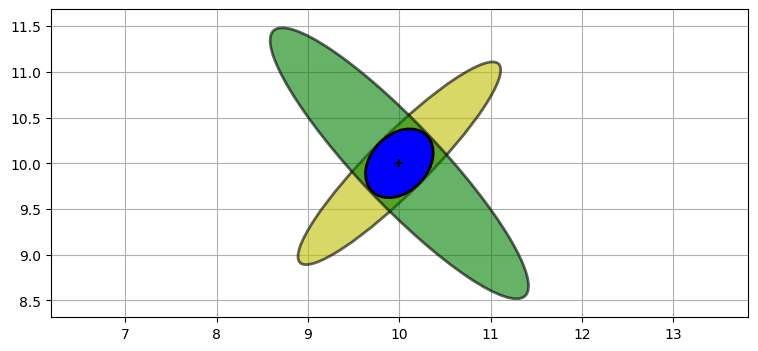

In [37]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

飞机唯一可能的位置是两个椭圆相交的地方。 由先验和测量相乘形成的交集是一个新的高斯分布。 形状反映了问题的几何形状。 这使我们能够在飞机上*三角测量*，从而得出非常准确的估计。 我们没有明确地编写任何代码来执行三角测量； 这是将每个测量的高斯相乘的自然结果。

回想一下 **g-h 过滤器** 章节，我们在天平上显示了两次称量的误差线。 估计值必须落在误差线重叠的区域内。 这里的估计值必须在 161 到 163 磅之间。

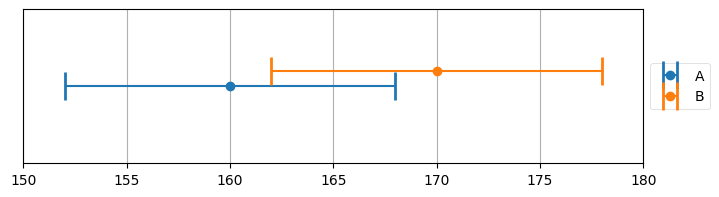

In [38]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

让我们考虑一个不同的布局。 假设第一个雷达直接位于飞机的左侧。 我可以用

$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

在这里，我们看到了先验乘以测量的结果。

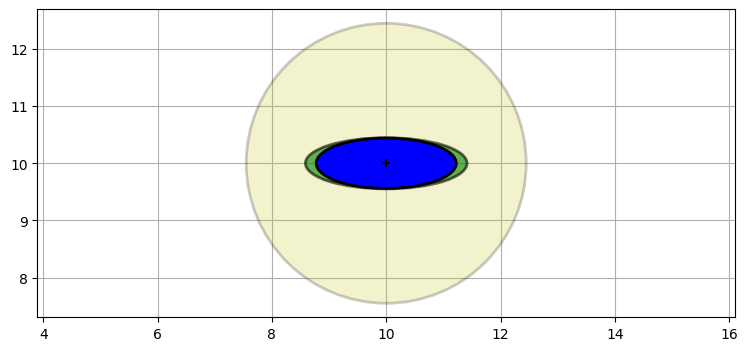

In [39]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

现在我们可以合并来自第二个雷达系统的测量结果，我们将把它保留在与以前相同的位置。

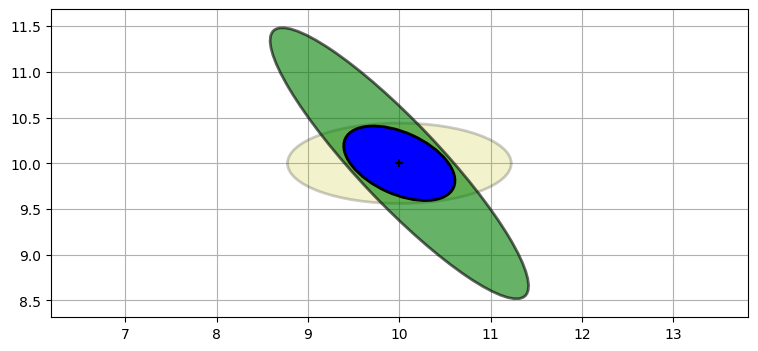

In [40]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

我们的估计不如前面的例子准确。 相对于飞机的位置，两个雷达站不再相互正交，因此三角测量不是最佳的。

最后一个例子，想象在短时间内从同一个雷达进行两次测量。 协方差椭圆将几乎重叠，在我们的新估计中留下非常大的误差：

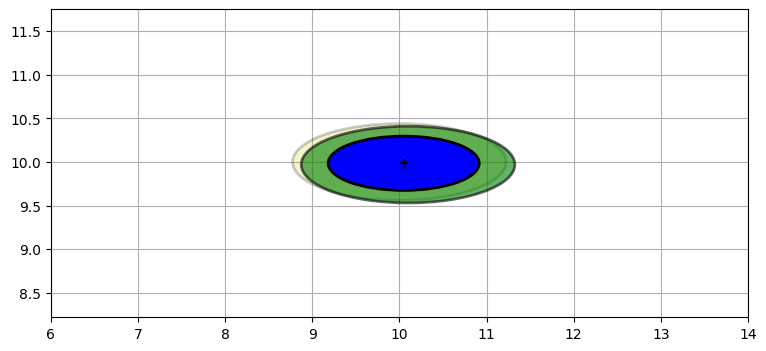

In [41]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')
plt.xlim(6, 14);

## Hidden Variables

您已经可以看到为什么多元卡尔曼滤波器比单变量卡尔曼滤波器的性能更好。 变量之间的相关性可以显着改善我们的估计。 我们可以更进一步。 **本节包含本章的关键见解，因此请仔细阅读**。

假设我们正在跟踪一架飞机，我们在时间 $t$=1、2 和 3 秒时获得了 $x$ 和 $y$ 坐标的以下数据。 你的直觉告诉你在时间 $t$=4 秒时 $x$ 的值是什么？

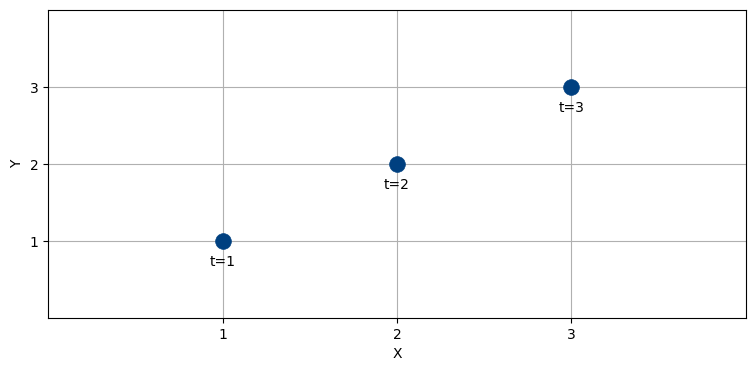

In [42]:
mkf_internal.show_position_chart()

飞机似乎在直线飞行，我们知道飞机不能转动一角钱。 最合理的猜测是在 $t$=4 时飞机位于 (4,4)。 我将用绿色箭头来描述它。

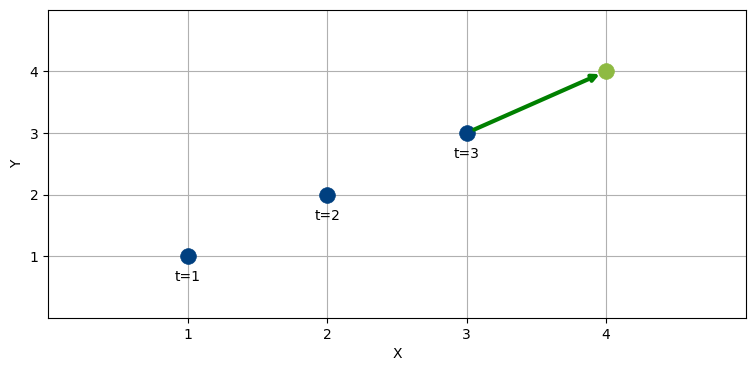

In [43]:
mkf_internal.show_position_prediction_chart()

你做出这个推断是因为你*推断*了飞机的恒定速度。合理的
假设飞机在每个时间步以 *x* 和 *y* 移动一个单位。

回想一下 **g-h 过滤器** 章节，当时我们试图改进嘈杂天平的重量预测。我们将*体重增加*纳入方程式，因为它使我们能够更好地预测第二天的体重。 g-h 过滤器使用 $g$ 参数来缩放赋予当前体重测量的重要性，而 $h$ 参数缩放赋予体重增加的重要性。

我们将对卡尔曼滤波器做同样的事情。毕竟，卡尔曼滤波器是 g-h 滤波器的一种形式。在这种情况下，我们正在跟踪一架飞机，因此我们需要跟踪位置和速度，而不是重量和重量增加。体重增加是重量的*导数*，当然速度是位置的导数。绘制和理解绘制 *x* 和 *y* 以及它们各自的速度所需的 4D 图表是不可能的，所以让我们为 $x$ 进行绘制，因为知道数学可以推广到更多维度。

在时间 1，我们可能相当确定位置 (x=0)，但不知道速度。我们可以用这样的协方差矩阵来绘制它。较窄的宽度表示我们对位置的相对确定性，而较高的高度表示我们对速度缺乏了解。

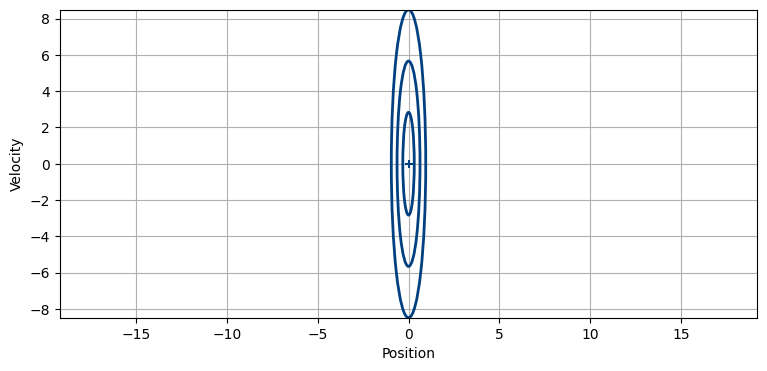

In [44]:
mkf_internal.show_x_error_chart(1)

然而，位置和速度是相关的。 如果速度为 5 m/s，则在 1 秒内位置将为 5 m。 如果速度为 -10 m/s，则在 1 秒内位置将为 -10 m。 让我们用绘制在对角线上的速度协方差来可视化这一点。

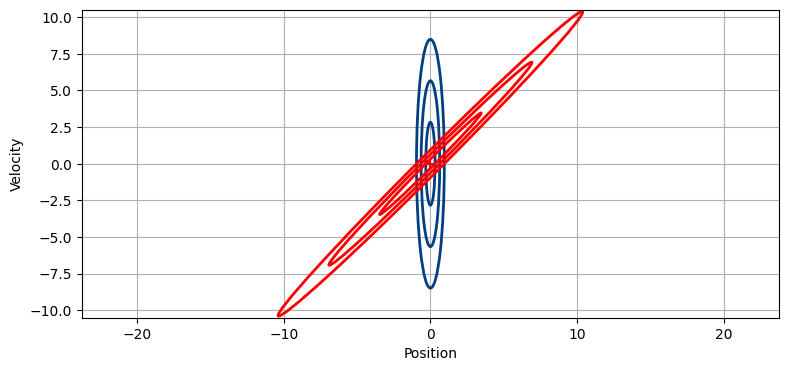

In [45]:
mkf_internal.show_x_error_chart(2)

在这一点上，速度协方差对我们没有帮助。 我们无法预测新位置，因为我们不知道速度是多少。 但是一秒钟后，我们得到了 x=5 的位置更新。

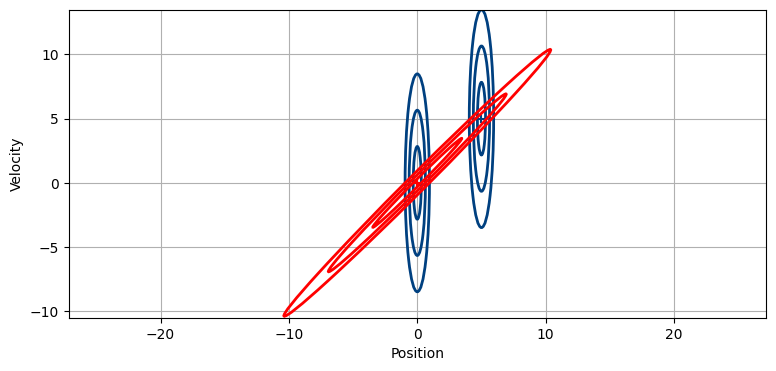

In [46]:
mkf_internal.show_x_error_chart(3)

直到下一章我才会清楚我如何计算我要说的内容。忽略计算，想想这意味着什么。我们没有简单的方法来判断物体的真正位置，因为我们对速度非常不确定。因此，椭圆在 x 轴上延伸得很远。当然，我们对速度的不确定性意味着它在 y 轴上也非常分散。但正如我在上一段中所说，位置与速度相关。如果速度为 5 m/s，则下一个位置将为 5，如果速度为 10，则下一个位置将为 10。它们非常相关，因此椭圆必须非常窄。

两个协方差的这种叠加就是神奇发生的地方。时间 t=1（其中位置=5）的唯一合理估计大致是速度协方差和测量协方差之间的交集！更准确地说，我们可以使用上一节中的数学并将两个协方差相乘。从贝叶斯的角度来看，我们将先验乘以证据的概率（*可能性*）以获得后验。如果我们使用贝叶斯方程将位置协方差与速度协方差相乘，我们会得到以下结果：

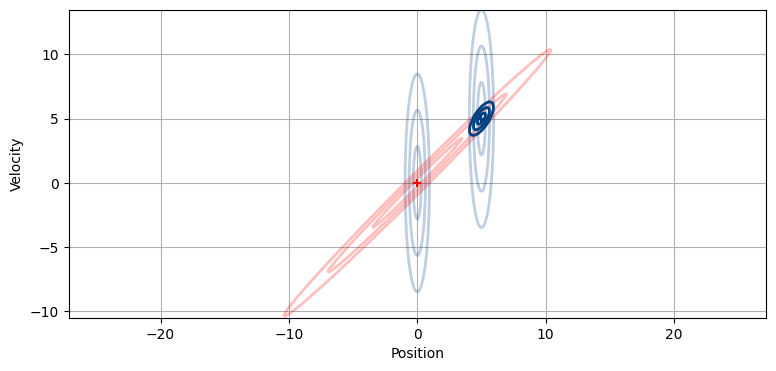

In [47]:
mkf_internal.show_x_error_chart(4)

新的协方差（后验）位于位置协方差和速度协方差的交点处。它略微倾斜，表明位置和速度之间存在一些相关性。更重要的是，它比位置或速度协方差小得多。在上一章中，每次执行“update()”时，我们的方差都会变小，因为之前的估计值乘以新的测量值。同样的情况也发生在这里。但是，这里的改进明显更好。这是因为我们使用了两条不同的信息，但它们是相关的。大致了解速度及其相关性和位置使我们能够做出非常准确的估计。在这张图中不容易看出，但位置的不确定性已经变小了。我们知道这一点是因为新的协方差在 x 轴上没有达到 t=1 时的测量协方差那么远。因此，与仅使用位置测量而不考虑速度相比，我们不仅对速度更加确定，而且对位置也更加确定！

这是一个重点，请仔细阅读！雷达仅检测飞机的位置。这被称为*观察变量*。基于位置估计，我们可以计算速度。我们称速度为*隐藏变量*。隐藏意味着它听起来像 - 没有测量速度的传感器，因此它的值对我们隐藏。我们能够使用位置和速度之间的相关性来非常准确地推断出它的值。

为了完善术语，还有*未观察到的变量*。例如，飞机的状态包括航向、发动机转速、重量、颜色、飞行员的名字等。我们无法使用位置传感器直接感知这些，因此不会*观察到*。无法从传感器测量和相关性中*推断*它们（红色平面不会比白色平面更快），因此它们不会*隐藏*。相反，它们是*不可观察的*。如果您在过滤器状态中包含一个未观察到的变量，那么对该变量的估计将是无稽之谈。

是什么让这成为可能？想象一下，我们将另一架飞机的速度叠加在位置图上。显然，这两者没有关系，而且将两者结合起来不可能产生任何额外的信息。相比之下，这架飞机的速度告诉我们一些非常重要的东西——行进的方向和速度。只要飞机不改变它的速度，速度就可以让我们预测下一个位置在哪里。在相对较小的速度误差之后，它与位置良好匹配的概率非常小。想一想——如果你突然改变方向，你的位置也会发生很大变化。如果位置的测量不是在速度变化的方向上，它就不太可能是真的。两者是相关的，所以如果速度改变，位置也必须改变，并且以可预测的方式。

重要的是要了解我们正在利用速度和位置相关的事实。我们从两次测量之间的距离和时间粗略估计速度，并使用贝叶斯定理在几次观察后产生非常准确的估计。如果您有任何疑问，请重新阅读本节。如果你不理解这一点，你很快就会发现无法推理你将在接下来的章节中学到什么。

如果只关心位置，包括速度的影响对我来说似乎很小。但这只是在一次更新之后。在下一章中，我们将看到在多次更新之后我们的确定性有了怎样的显着提升。测量方差会很大，但估计的位置方差会很小。每次将速度协方差与位置相交时，它在 x 轴上变得更窄，因此每次方差也更小。

## Higher Dimensions

到目前为止，我已经向您展示了二维高斯，但数学并不限制您使用二维。 在后面的章节中，我们将使用 9 维，甚至 12 维。 如果您在天气预报等领域工作，您最终可能会得到数千个维度。

这些更高的维度“看起来像什么？ 好吧，二维高斯可以用一个误差椭圆来表示，所以按道理一个三维高斯可以用一个 3D 误差椭圆来表示。 我们不会在这里深入研究数学，但事实证明这是真的。 `FilterPy` 提供了一个绘制这个椭圆的函数。

首先，让我们用给定的协方差制作一些嘈杂的数据，这样我们就可以在椭球内绘制它。

In [48]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

现在我们用 `FilterPy` 函数 `plot_3d_covariance` 绘制椭圆体，然后散点图样本。

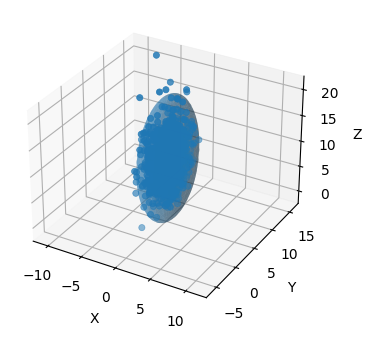

In [49]:
ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);

理论指出，大约 99% 的分布将落在 3 个标准差内，而且情况似乎如此。

九维？ 我还没有完全弄清楚如何在 2D 屏幕上绘制 9D 椭球，所以不会有图表。 概念是一样的； 分布的标准差误差可以用一个 9D 椭球来描述。

## Summary

我们利用系统的几何形状和相关性来产生非常准确的估计。数学并不关心我们是在处理两个位置，还是一个位置和一个相关的速度，或者这些是空间维度。如果建筑面积与房价相关，您可以编写卡尔曼滤波器来跟踪房价。如果年龄与疾病发病率相关，您可以编写卡尔曼滤波器来跟踪疾病。如果僵尸人口与猎枪数量成反比，那么您可以编写卡尔曼滤波器来跟踪僵尸人口。我在几何方面向您展示了这一点，并谈到了*三角测量*。那只是为了建立你的直觉。您可以为没有几何表示的状态变量编写卡尔曼滤波器，例如股票价格或奶牛产奶量的滤波器（我收到了来自跟踪产奶量的人的电子邮件！）习惯于将这些视为具有相关性的高斯分布。如果我们可以将我们的不确定性表示为多维高斯，我们就可以将先验乘以似然性并获得更准确的结果。

## References

- [1] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

- [2] `FilterPy` library. Roger Labbe.
https://github.com/rlabbe/filterpy